# <center>数据分析期末报作业：印度电影分析报告</center>
===========================================================================================================================================
<p align="right">第17组</p>
<p align="right">王鑫轶 大数据2001</p>
<p align="right">石家绮 大数据2001</p>

# 导入相关库和数据

导入库并完成相关画图的设置

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # 画图风格设置
# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
# 忽略警告
import warnings
warnings.filterwarnings('ignore')

导入数据集

In [2]:
metadata=pd.read_csv('data/movies_data.csv') # 导入数据

# 1. 印度电影整体描述性分析

## 1.1 电影整体信息描述

In [3]:
metadata.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


## 1.2印度电影年份分析

In [4]:
year_data=metadata.groupby(by='Year') # 以年份分类

In [5]:
cnt=0    # 计数
dict1={} # 保存年份
dict2={} # 保存数量
dict3={} # 保存评分的平均分
dict4={} # 保存评分的最大值
dict5={} # 保存评分最大的电影的编号
for gp, data in year_data:
    cnt+=1
    dict1[cnt]=gp
    dict2[cnt]=data.shape[0]
    dict3[cnt]=np.mean(data['Rating'])
    dict4[cnt]=np.max(data['Rating'])
dict_={'year':dict1,'cnt':dict2,'means':dict3,'max':dict4}
movie_num_every_year=pd.DataFrame(dict_)

### 图1 (a)每年印度电影数量曲线图

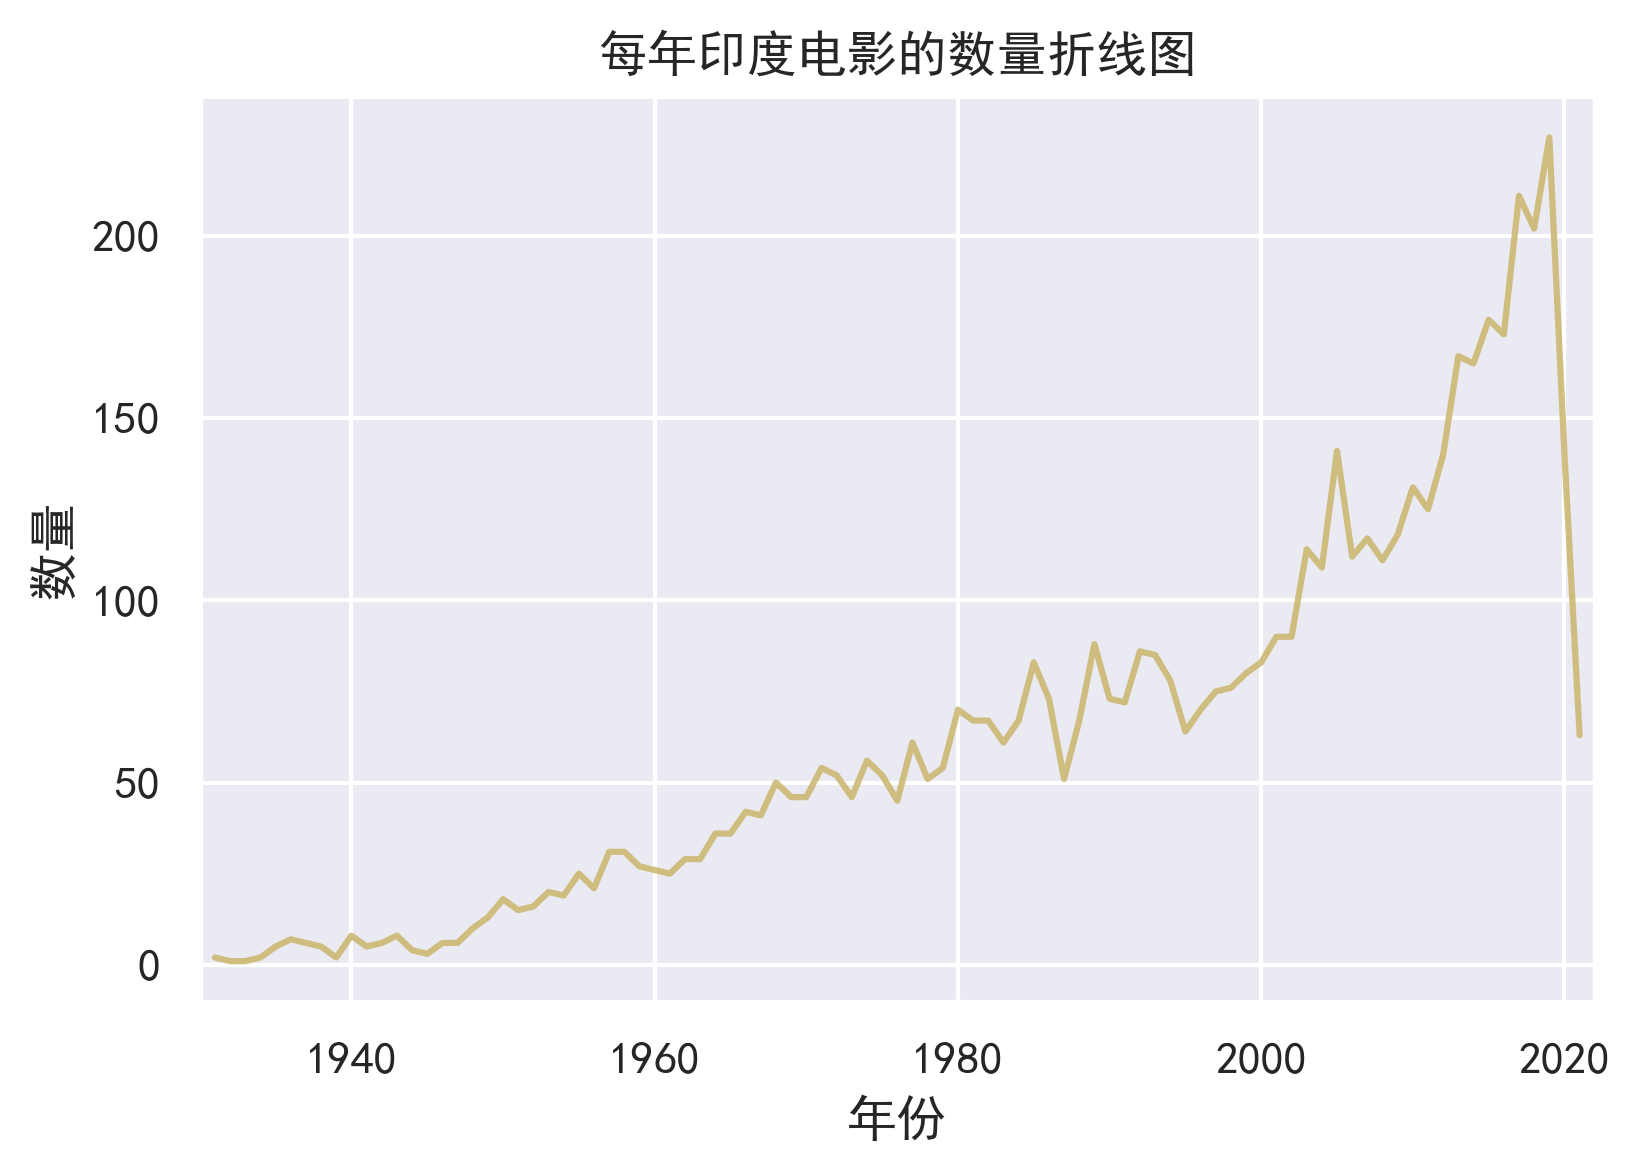

In [6]:
fig= plt.figure(dpi=300)
plt.rcParams['savefig.dpi'] = 300 #图片像素
x=movie_num_every_year['year'].values
y1=movie_num_every_year['cnt'].values
plt.plot(x,y1,c='y',marker='',alpha=0.9) 
plt.xlim(1930,2022) # 设置x区间
plt.title("每年印度电影的数量折线图")
plt.xlabel("年份")
plt.ylabel("数量")
plt.savefig("每年电影数量.jpg") # 保存图片

### (b)不同年份电影评分图

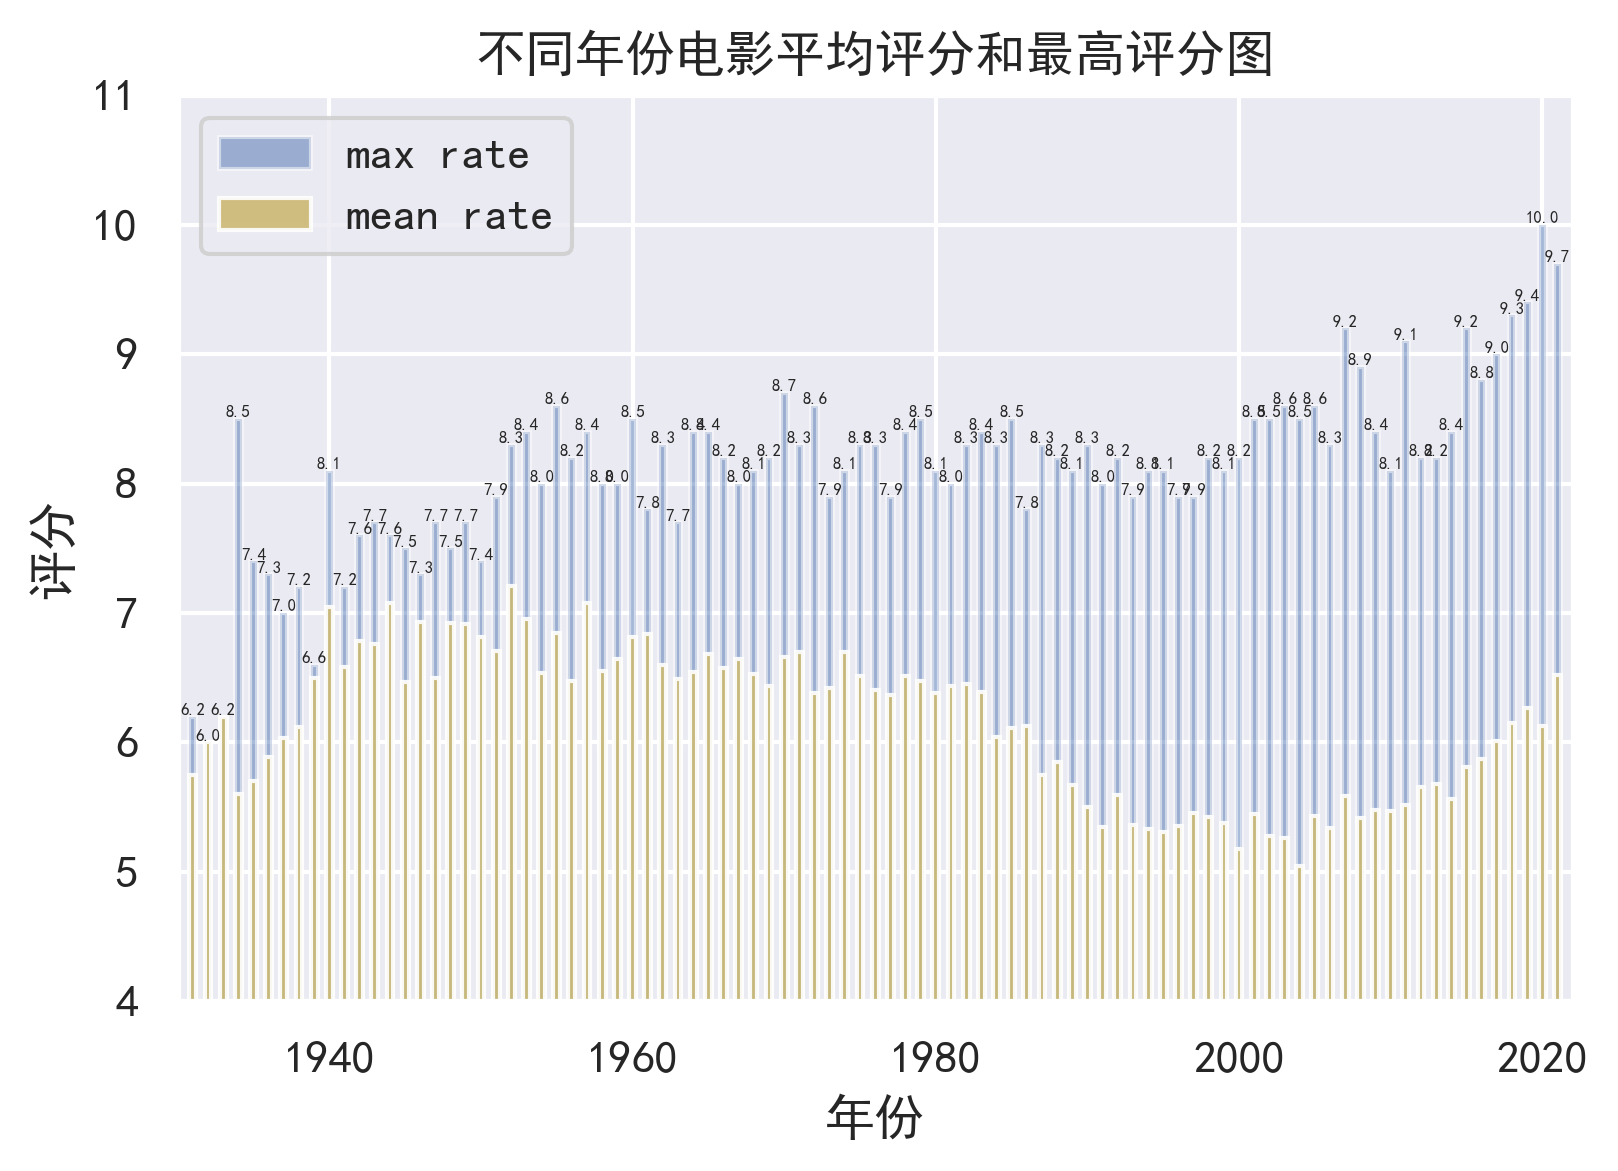

In [7]:
fig=plt.figure(dpi=300)
y2=movie_num_every_year['means'].values
y3=movie_num_every_year['max'].values
#条形图
plt.bar(x,y3,width = 0.45,align='center',color = 'b',alpha=0.5,label='max rate')
plt.bar(x,y2,width = 0.45,align='center',color = 'y',alpha=0.9,label='mean rate')
plt.ylim(4,11)
plt.xlim(1930,2022)
plt.xlabel('年份')
plt.ylabel('评分')
plt.title('不同年份电影平均评分和最高评分图')
plt.legend() # 显示图标
# 打印下方条形图的数据
for a,b in zip(x,y3):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=4)
#保存成图片
plt.savefig("不同年份电影平均评分和最高评分.jpg")


# 2.印度电影时长、评分分析

## 2.1时长分布及分析

In [8]:
metadata_2=metadata.copy() # 拷贝一份数据

In [9]:
# 将时长分区间
def init_duration(s): # 定义函数
    if s<90:
        return '<90'
    elif s<150:
        return '90-120'
    elif s<240:
        return '120-150'
    else:
        return '>150'
metadata_2['Duration']=metadata_2['Duration'].apply(init_duration)

### 图2 不同时长的电影数量饼图

In [10]:
dur_by=metadata_2.groupby(by='Duration') # 以时长分类

durarion_num={}
for gp,data in dur_by:
    durarion_num[gp]=data.shape[0]

durarion_num # 显示不同时长区间的数据

{'120-150': 1473, '90-120': 3944, '<90': 234, '>150': 8}

|时长|<90|90-120|120-150|>150|
|----|---|------|-------|----|
|数量|234|3944|1473|8   |

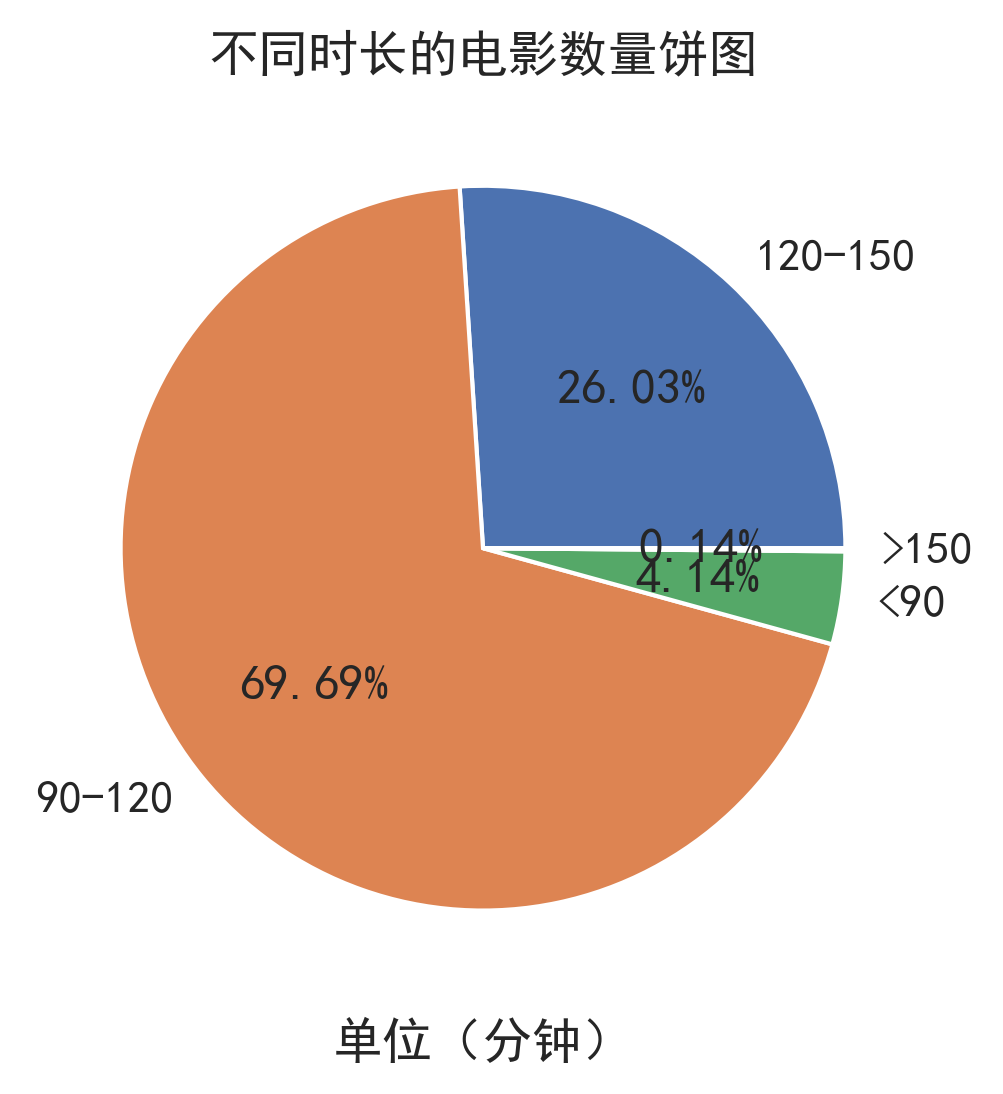

In [11]:
fig=plt.figure(dpi=300)
plt.pie(labels=durarion_num.keys(),x=durarion_num.values(),autopct='%.2f%%') # 画饼图
plt.title('不同时长的电影数量饼图')
plt.xlabel('单位（分钟）')
plt.savefig('不同时长的电影数量饼图.jpg') # 保存

## 2.2评分分布及分析

In [12]:
# 将评分分区间
def init_Rating(s): # 定义函数
    if s<4:
        return '0-4'
    elif s<7:
        return '4-7'
    else:
        return '7-10'
metadata_2['Rating']=metadata_2['Rating'].apply(init_Rating)

### 图3 不同评分的电影数量饼图

In [13]:
Rating_by=metadata_2.groupby(by='Rating') # 以评分分组
# 获得每组的数量并保存与字典
Rating_num={}
for gp,data in Rating_by:
    Rating_num[gp]=data.shape[0]
    
Rating_num # 显示结果

{'0-4': 565, '4-7': 3728, '7-10': 1366}

|评分|0-4|4-7|7-10 |
|----|---|---|----|
|数量|565|3728|1366|

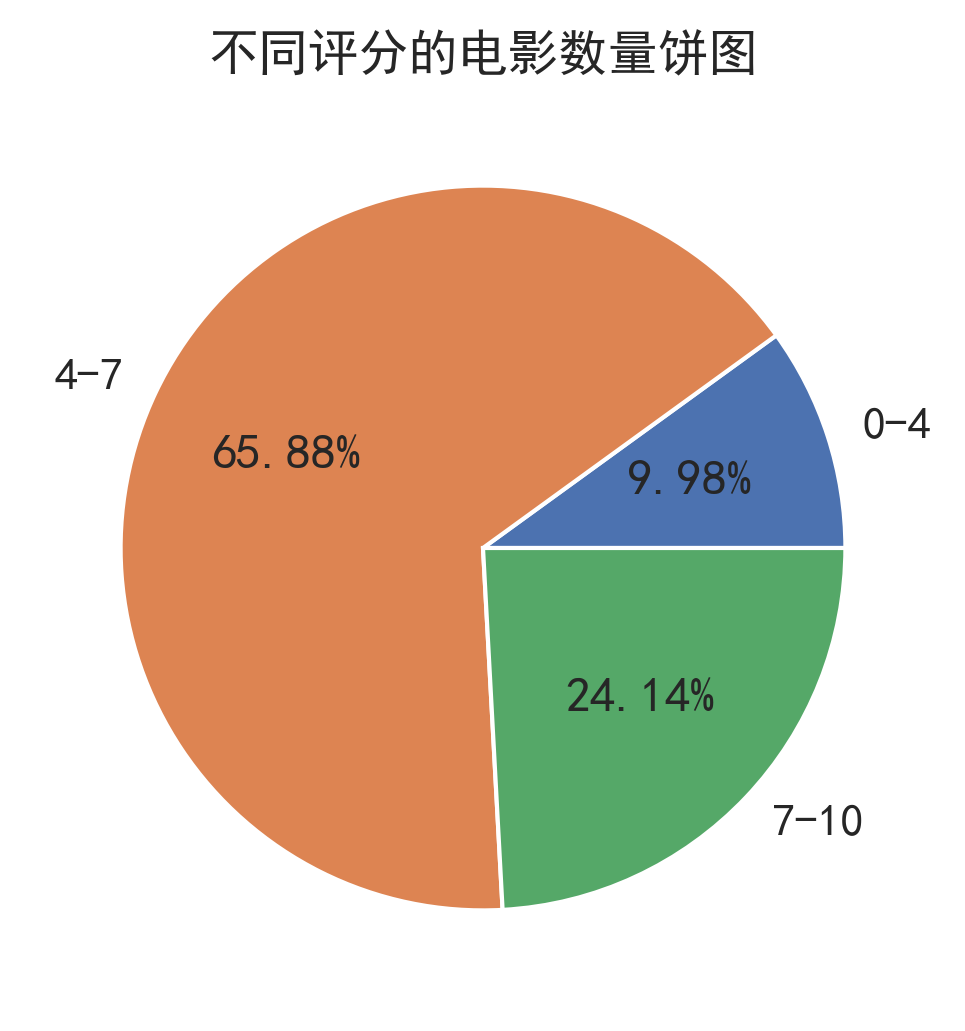

In [14]:
# 画饼图
fig=plt.figure(dpi=300)
plt.pie(labels=Rating_num.keys(),x=Rating_num.values(),autopct='%.2f%%')
plt.title('不同评分的电影数量饼图')
plt.savefig('不同评分的电影数量饼图.jpg')

### 图4.评分与投票人数关系图

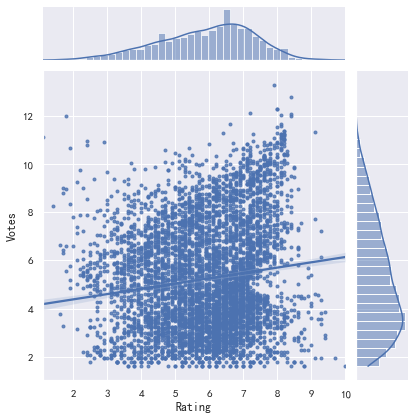

In [15]:
data_copy=metadata.copy() # 获得数据集的拷贝
data_copy['Votes']=np.log(data_copy['Votes']) # 将投票人数取对数
ppp=sns.jointplot('Rating','Votes',data=data_copy,kind='reg',marker='.') # 画图
ppp.savefig('评分和投票人数关系图.jpg',dpi=300)

## 2.3 时长对评分的影响

In [16]:
metadata_1=metadata.copy() # 获得数据集的拷贝
# 将时长四舍五入
def arounds(s):
    return (s//10+(s%10>=5))*10
metadata_1['Duration']=metadata_1['Duration'].apply(arounds)

In [17]:
dur_by=metadata_1.groupby(by='Duration') # 以时长分组
# 获得不同时长的平均评分数据并保存
durarion_mean={}
for gp,data in dur_by:
    durarion_mean[gp]=data['Rating'].mean()

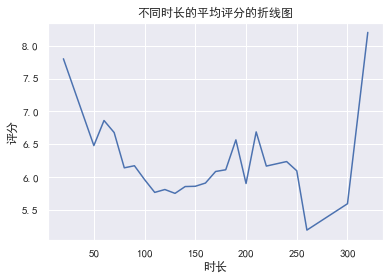

In [18]:
# 画图
plt.plot(durarion_mean.keys(),durarion_mean.values())
plt.title('不同时长的平均评分的折线图')
plt.xlabel('时长')
plt.ylabel('评分')
plt.savefig('不同时长的平均评分的折线图.jpg')

### (b)时长与评分关系图

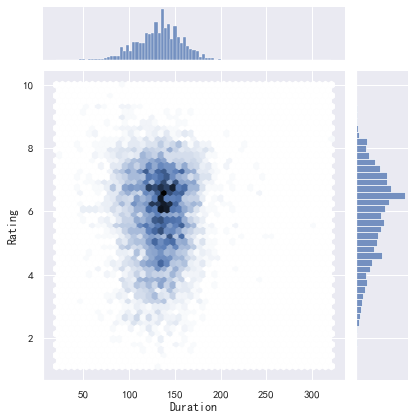

In [19]:
sns.axes_style('white')
sns_plot=sns.jointplot('Duration','Rating',data=metadata,kind='hex')
sns_plot.savefig('时长和评分关系图.jpg')

# 3.印度电影类型分析

## 3.1 电影类型整体分析

### 图6 (a)不同类型电影数量统计图

In [20]:
type_of_movies=dict() # 获得电影的类型及其相应的电影数量
for ty in metadata['Genre'].values:
    ls=ty.split(', ')
    for i in ls:
        if i in type_of_movies.keys():
            type_of_movies[i]+=1
        else:
            type_of_movies[i]=1
type_of_movies=pd.Series(type_of_movies) # 转化为 Series 格式

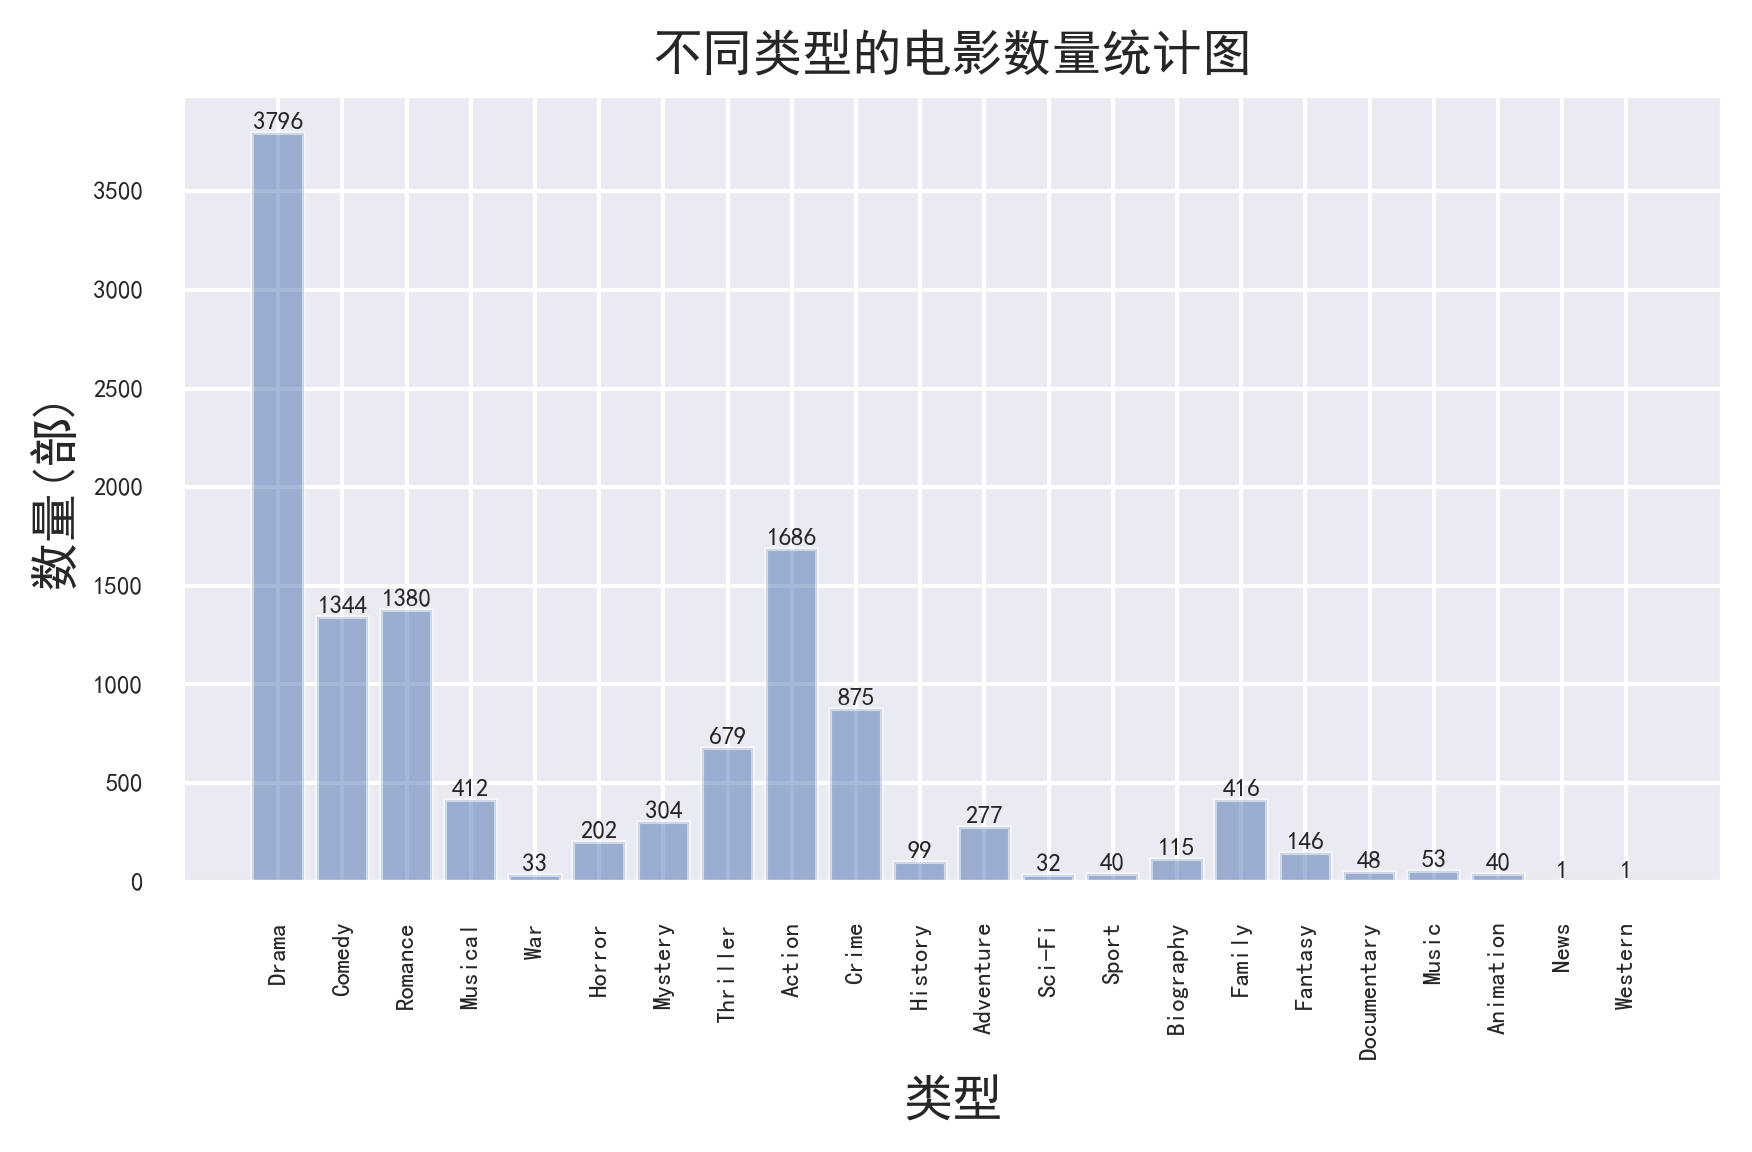

In [21]:
fig= plt.figure(dpi=300) # 图片像素
plt.bar(type_of_movies.keys(),type_of_movies.values,color='b',alpha=0.5)
for a,b in zip(type_of_movies.keys(),type_of_movies.values):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=6)
plt.title("不同类型的电影数量统计图")
plt.xticks(size=6,rotation=90) # x标签旋转90度
plt.yticks(size=6)
plt.xlabel("类型")
plt.ylabel("数量(部)")
plt.tight_layout() # 可以使之完整保存图像
plt.savefig("不同类型的电影数量.jpg")

### (b) 电影类型气泡图

In [22]:
type_of_movies_num=type_of_movies.copy() # 获得电影数量
type_of_movies_vote_sum=type_of_movies.copy() # 获得电影类型
for k in type_of_movies_vote_sum.keys(): #初始化字典
    type_of_movies_vote_sum[k]=0.0
type_of_movies_Rate_mean=type_of_movies_vote_sum.copy() #获得电影评分
type_of_movies_Rate_mean = type_of_movies_Rate_mean.astype(float)
for i in metadata.index:
    for k in metadata.loc[i,'Genre'].split(', '):
        type_of_movies_vote_sum[k]+=metadata.loc[i,'Votes']
        type_of_movies_Rate_mean[k]+=metadata.loc[i,'Rating']

dict_={'num':type_of_movies_num,'Vote_sum':type_of_movies_vote_sum,'Rate_mean':type_of_movies_Rate_mean}
type_of_movies_done=pd.DataFrame(dict_) # 转换为DF

type_of_movies_done['Rate_mean']=type_of_movies_Rate_mean.values/type_of_movies_num.values # 获得电影平均评分

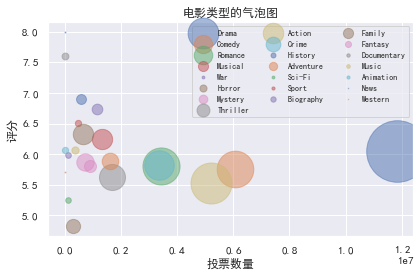

In [23]:
# 绘制不同类型电影的气泡图
for tp in type_of_movies.keys():
    plt.scatter(x = type_of_movies_done.loc[tp,'Vote_sum'],
                y = type_of_movies_done.loc[tp,'Rate_mean'],
                s = type_of_movies_done.loc[tp,'num'],
                label = tp,
                alpha = 0.5
                )
# 添加x轴和y轴标签
plt.xlabel('投票数量')
plt.ylabel('评分')
# 添加标题
plt.title('电影类型的气泡图')
# 添加图例
plt.legend(loc='best',ncol=3,markerscale=0.5,fontsize=8)
plt.tight_layout() # 可以使之完整保存图像
#设置纵坐标的刻度范围
# plt.ylim((-120000, 350000))
# 显示图形
plt.savefig('电影类型的气泡图.jpg',dpi=300)

### 图7 不同组合类型电影投票及评分统计图

In [24]:
data_copy_11=metadata.copy()
# 获得不同组合电影数量
def fun_1(s):
    return len(s.split(', '))
data_copy_11['Genre']=data_copy_11['Genre'].apply(fun_1)
arr1=data_copy_11.groupby(by='Genre')['Votes'].sum() # 获得总投票数
arr2=data_copy_11.groupby(by='Genre')['Rating'].mean() # 获得总评分

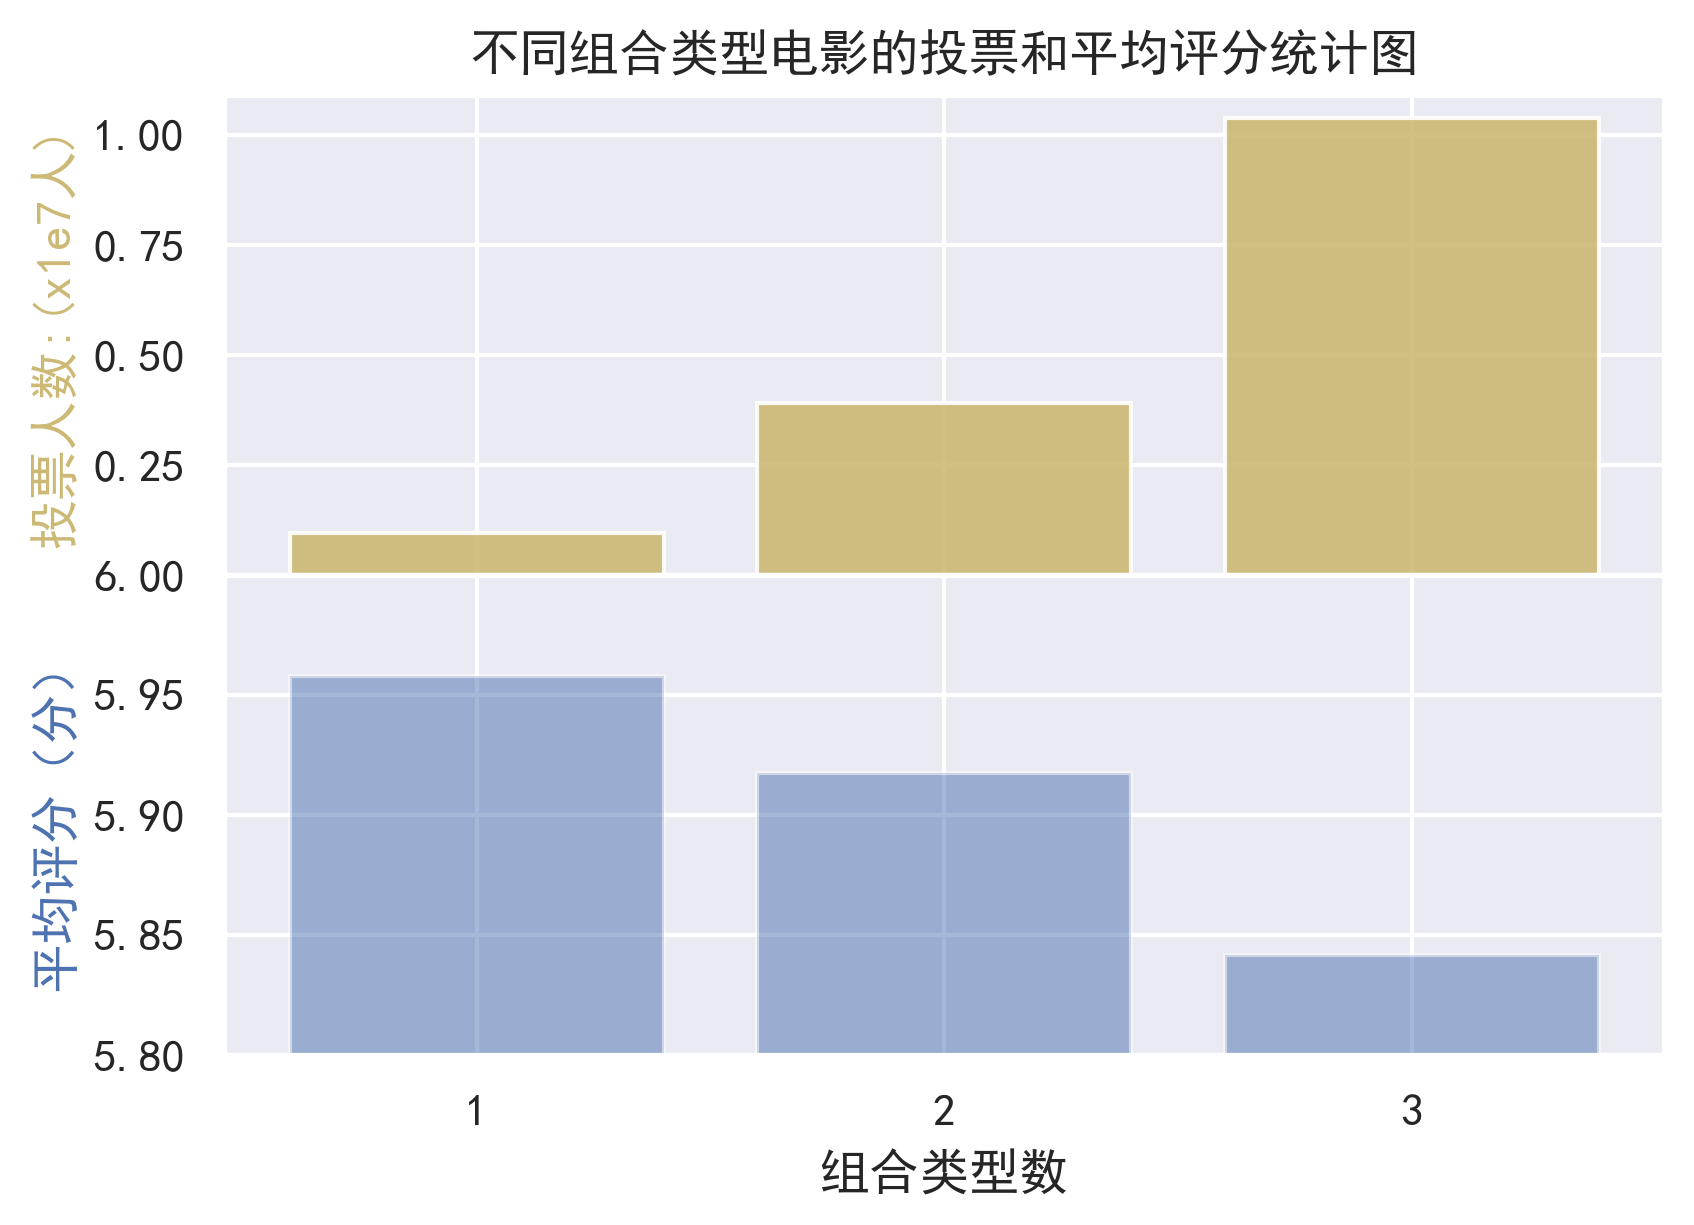

In [25]:
fig=plt.figure(dpi=300) # 定义画布
ax1=fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=[],yticklabels=['','0.25','0.50','0.75','1.00']) # 增加 ax 并说明位置
ax2=fig.add_axes([0.1,0.1,0.8,0.4],ylim=(5.8,6))
ax1.bar(list(arr1.keys()),list(arr1.values),color='y',alpha=0.9) # 透明的为0.9
ax2.bar(list(arr2.keys()),list(arr2.values),color='b',alpha=0.5)
ax1.set_xticks([1,2,3])
ax2.set_xticks([1,2,3])
ax2.set_xlabel('组合类型数')
ax1.set_ylabel("投票人数:(x1e7人)",color='y')
ax2.set_ylabel("平均评分（分）",color='b')
ax1.set_title('不同组合类型电影的投票和平均评分统计图')
plt.savefig('不同组合类型电影的投票和平均评分统计图.jpg',dpi=300) # 保存

## 3.2 高分电影类型分析

### 图8 top movie 电影类型统计图

In [26]:
dict_={}
for gp,data in year_data: # 获得数据
    data.sort_values(by=['Rating','Votes'],ascending=[False,False],inplace=True) # 排序：先以评分，再是投票
    dict_[gp]=data.iloc[0,:]
top_movies=pd.DataFrame(dict_)
top_movies = top_movies.T
top_movies.columns=metadata.columns

In [27]:
type_of_top_movies=dict() # 获得电影的类型及其相应的电影数量
for ty in top_movies['Genre'].values:
    ls=ty.split(', ') # 拆分字符串，获得电影类型
    for i in ls: # 记录
        if i in type_of_top_movies.keys():
            type_of_top_movies[i]+=1
        else:
            type_of_top_movies[i]=1
type_of_top_movies=pd.Series(type_of_top_movies) # 转化为Serise格式

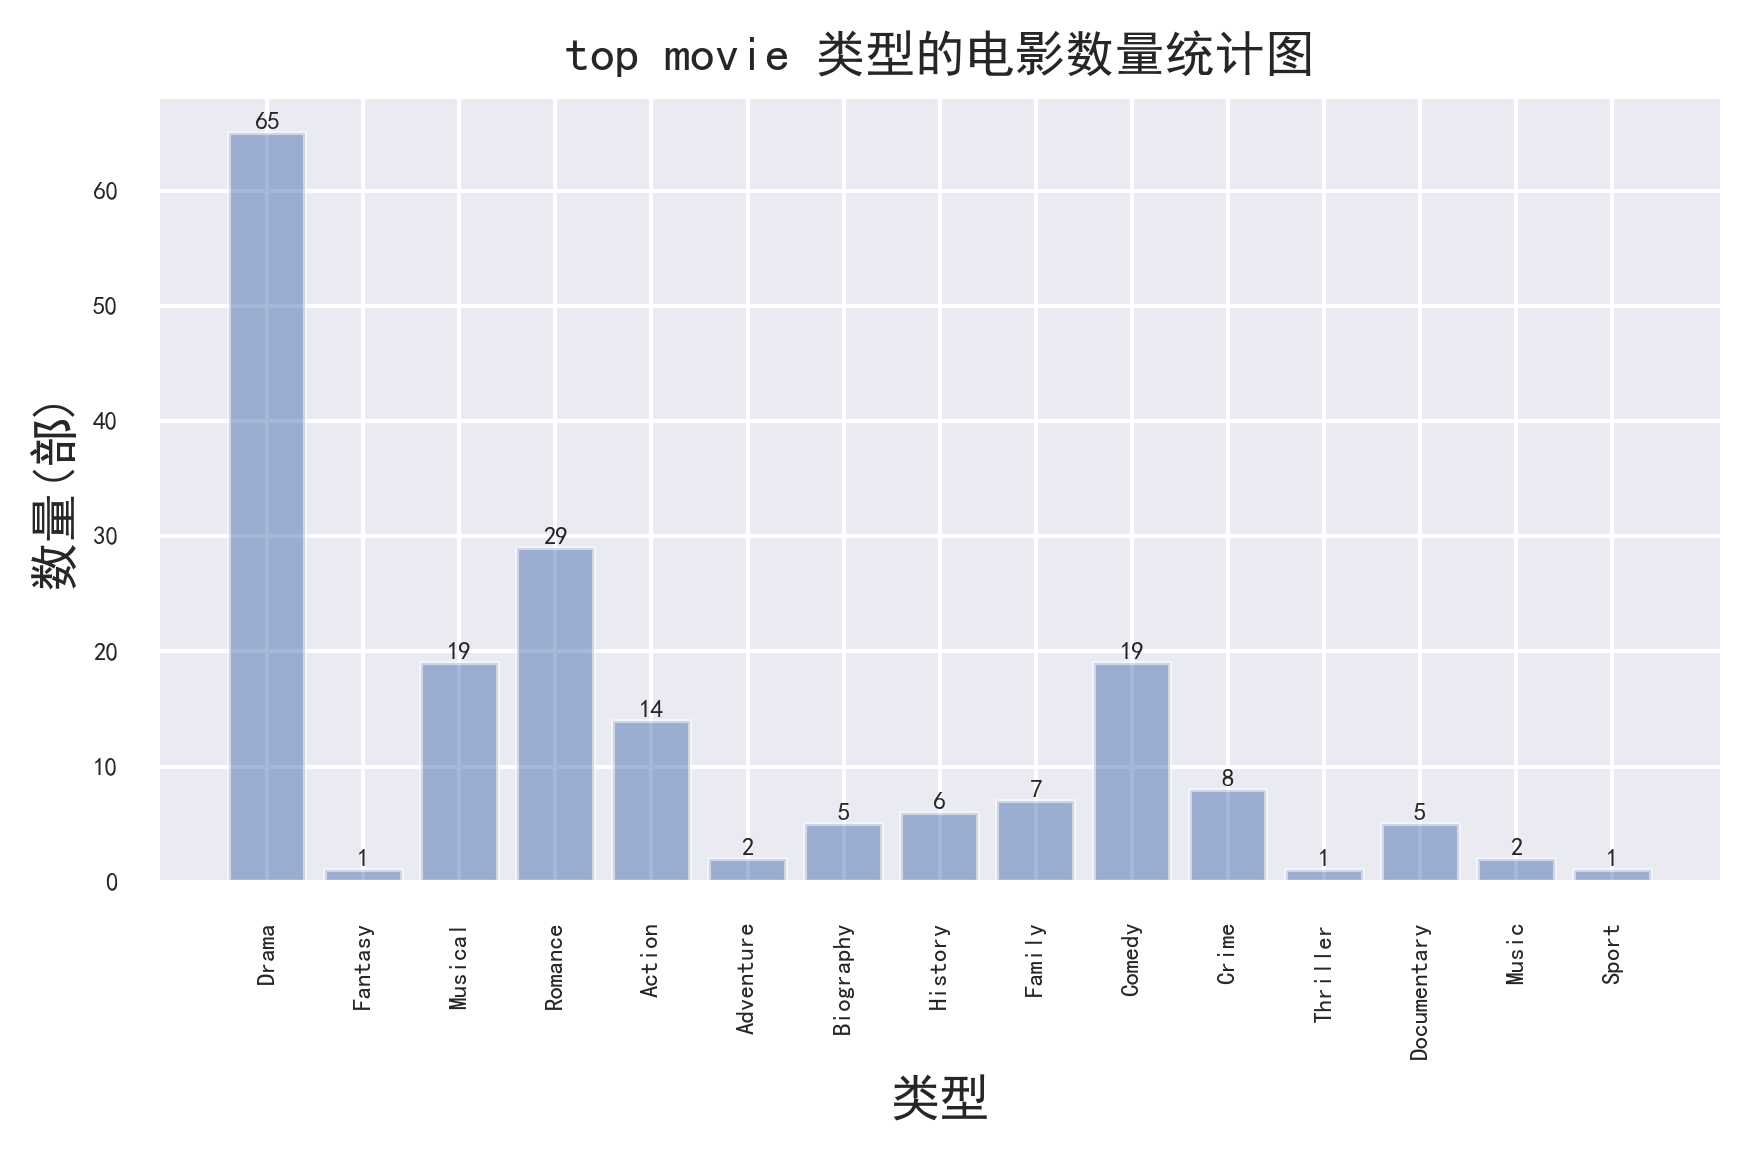

In [28]:
fig= plt.figure(dpi=300) # 图片像素
plt.bar(type_of_top_movies.keys(),type_of_top_movies.values,color='b',alpha=0.5)
for a,b in zip(type_of_top_movies.keys(),type_of_top_movies.values):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=6)
plt.title("top movie 类型的电影数量统计图")
plt.xticks(size=6,rotation=90)
plt.yticks(size=6)
plt.xlabel("类型")
plt.ylabel("数量(部)")
plt.tight_layout() # 可以使之完整保存图像
plt.savefig("top_movie类型的电影数量.jpg")

# 4.印度电影导演分析

### 图9导演高分电影数及平均评分图

In [29]:
data_tem=metadata[metadata['Rating']>=7] # 评分7分以上的电影

In [30]:
dir_gb=data_tem.groupby(by='Director') # 以导演分组
# 计算出平均分
dir_high_rating_num={}
dir_high_rating_mean={}
for gp,data in dir_gb:
    dir_high_rating_num[gp]=data.shape[0]
    dir_high_rating_mean[gp]=data['Rating'].mean()

dir_high_rating_num=pd.Series(dir_high_rating_num)
dir_high_rating_mean=pd.Series(dir_high_rating_mean)
dir_high_rating=pd.concat([dir_high_rating_num,dir_high_rating_mean],axis=1) # 连接两个Series

In [31]:
dir_high_rating.sort_values(0,ascending=False,inplace=True) # 排序
dir_high_rating=dir_high_rating.head(20) # 找出前20位

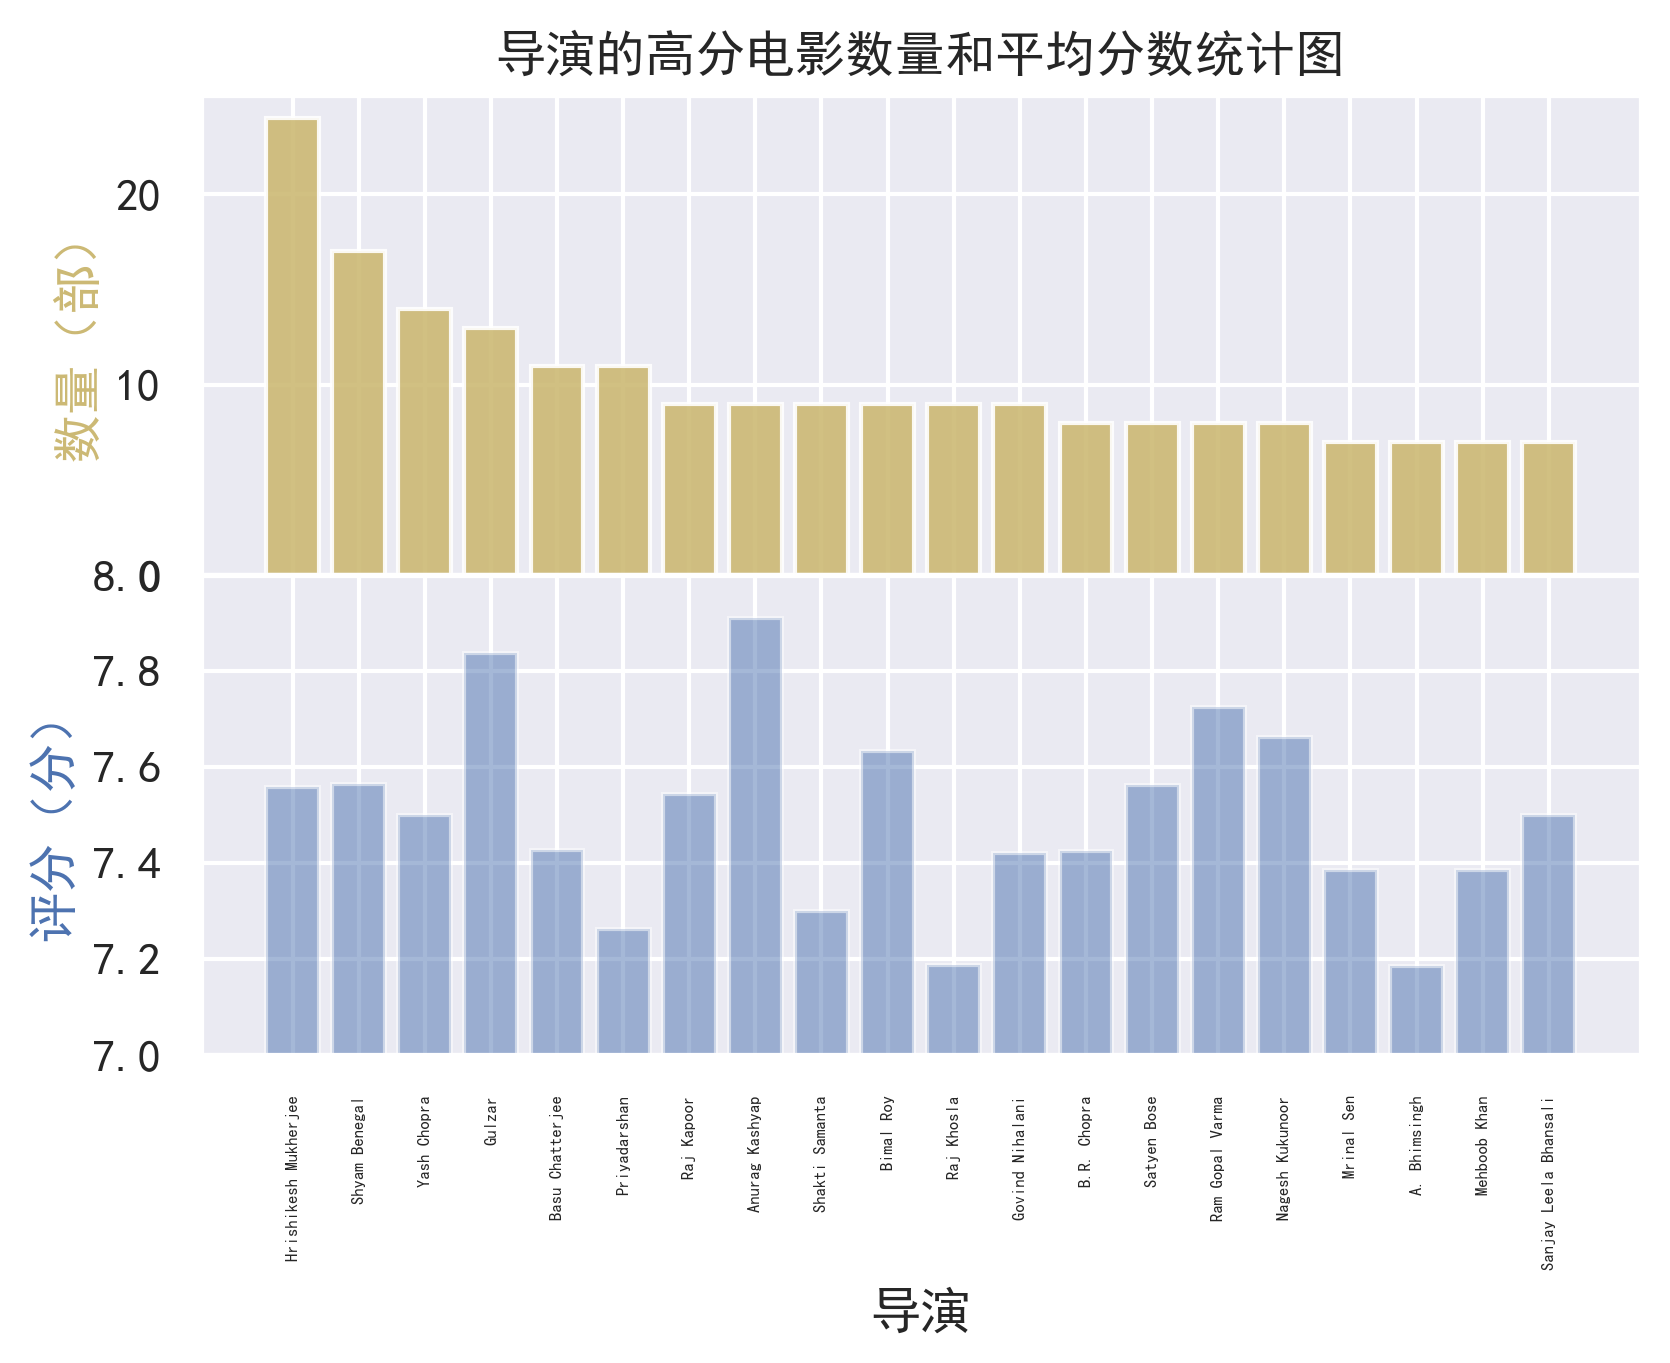

In [32]:
fig=plt.figure(dpi=300) # 定义画布
ax1=fig.add_axes([0.1,0.5,0.8,0.4],xticklabels=[]) # 增加 ax 并说明位置
ax2=fig.add_axes([0.1,0.1,0.8,0.4])
ax1.bar(list(dir_high_rating.index),list(dir_high_rating[0].values),color='y',alpha=0.9) # 透明的为0.9
ax2.bar(list(dir_high_rating.index),list(dir_high_rating[1].values),color='b',alpha=0.5)
ax2.set_ylim(7,8) # 限制y轴范围
ax2.set_xlabel("导演")
ax2.set_xticklabels(list(dir_high_rating.index),size=4,rotation=90)
ax1.set_ylabel("数量（部）",color='y')
ax2.set_ylabel("评分（分）",color='b')
ax1.set_title('导演的高分电影数量和平均分数统计图')
plt.savefig('导演的高分电影数量和平均分数统计图.jpg',dpi=300) 

# 5.印度电影演员分析

### 图10 演员参演高分电影数量统计图

In [33]:
actor_name=data_tem.loc[:,['Actor 1','Actor 2','Actor 3']].values # 获得演员数据
# 计算每位演员参加的电影数量
actor_cnt={}
for strs in actor_name:
    for str in strs:
        if str in actor_cnt.keys():
            actor_cnt[str]+=1
        else:
            actor_cnt[str]=1
            
actor_cnt=pd.Series(actor_cnt)

In [34]:
# 包装位字典
actor_reg={"1":actor_cnt[actor_cnt<=1].shape[0],
            "2":actor_cnt[actor_cnt==2].shape[0],
            "3":actor_cnt[actor_cnt==3].shape[0],
            "4":actor_cnt[actor_cnt==4].shape[0],
            "5":actor_cnt[actor_cnt==5].shape[0],
            "5-10":actor_cnt[(actor_cnt>5) & (actor_cnt<=10)].shape[0],
            "10-20":actor_cnt[(actor_cnt>10) & (actor_cnt<=20)].shape[0],
            ">20":actor_cnt[actor_cnt>=20].shape[0]}

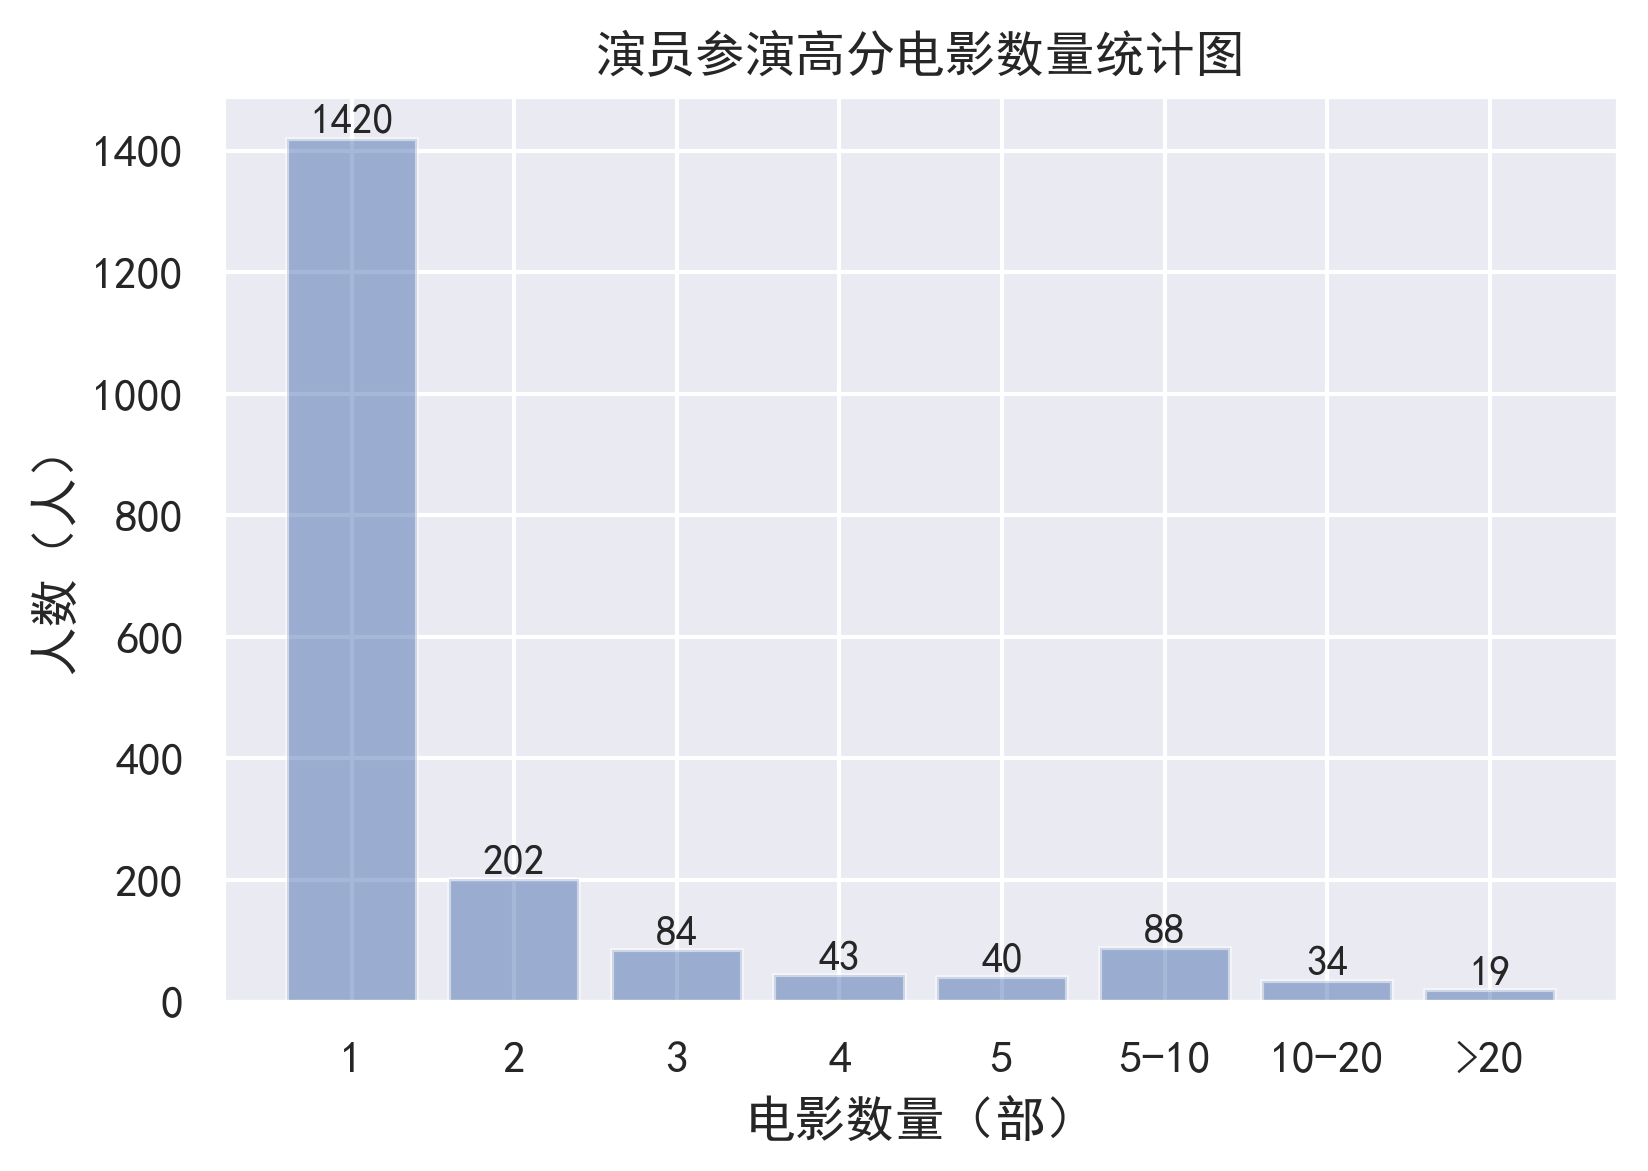

In [35]:
plt.figure(dpi=300) # 画图
plt.bar(actor_reg.keys(),actor_reg.values(),color='b',alpha=0.5)
# 加数字显示
for a,b in zip(actor_reg.keys(),actor_reg.values()):
    plt.text(a, b, '%s' % b, ha='center', va= 'bottom',fontsize=10)

plt.title("演员参演高分电影数量统计图")
plt.xlabel('电影数量（部）')
plt.ylabel('人数（人）')
plt.savefig("演员参演高分电影数量统计图.jpg")

### 表4.演员参演高分电影数排列

In [36]:
actor_cnt.sort_values(ascending=False).head()

Amitabh Bachchan    49
Ashok Kumar         38
Shabana Azmi        38
Naseeruddin Shah    37
Shashi Kapoor       35
dtype: int64

|演员|参演高分电影数量  |
|----|---------------- |
|Amitabh Bachchan|  49  |
|Ashok Kumar     |  38  |
|Shabana Azmi    |  38  |
|Naseeruddin Shah|  37  |
|Shashi Kapoor   |  35  |

# 6. 总结